## ExMAS
> Equilibrium matching - expieriments for the paper

---
# ILP for various Objective functions

* how can we minimize PoA with ILP

In [1]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [8]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
import ExMAS.games
from ExMAS.utils import inData as inData
from ExMAS.main import matching
import logging

In [4]:
params = ExMAS.utils.get_config('ExMAS/spinoffs/game/game_toy.json') # load the default 
params.t0 = pd.to_datetime(params.t0)
params.matching_obj = 'u_pax'
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph
inData.requests = ExMAS.utils.load_requests('ExMAS/spinoffs/game/toy.csv')

In [5]:
params.shared_discount = 0.5
params.logger_level = "CRITICAL"
inData = ExMAS.main(inData, params)
inData = ExMAS.games.prepare_PoA(inData)

In [49]:
inData.logger.setLevel(logging.WARNING)

In [17]:
ExMAS.games.leader_follower(inData)

04-11-20 10:31:36-INFO-order of travellers [9, 5, 6, 0, 4, 2, 3, 8, 1, 7]
04-11-20 10:31:36-INFO-9 selected 20 with [1, 9]
04-11-20 10:31:36-INFO-5 selected 19 with [5, 7]
04-11-20 10:31:36-INFO-6 selected 30 with [6, 8]
04-11-20 10:31:36-INFO-0 selected 24 with [0, 2]
04-11-20 10:31:36-INFO-4 selected 4 with [4]
04-11-20 10:31:36-INFO-2 already served
04-11-20 10:31:36-INFO-3 selected 3 with [3]
04-11-20 10:31:36-INFO-8 already served
04-11-20 10:31:36-INFO-1 already served
04-11-20 10:31:36-INFO-7 already served


[20, 19, 30, 24, 4, 3]

In [72]:
ret = ExMAS.games.test_leader_follower(inData, nShuffle = 300)

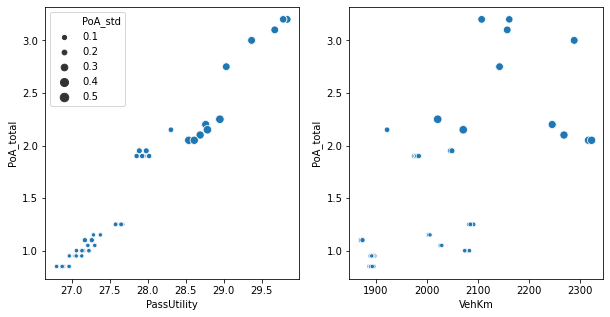

In [73]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.scatterplot(x='PassUtility',y='PoA_total', data = ret.T, ax = ax[0], size = 'PoA_std')
sns.scatterplot(x='VehKm',y='PoA_total', data = ret.T, ax = ax[1], size = 'PoA_std')
ax[1].get_legend().remove()

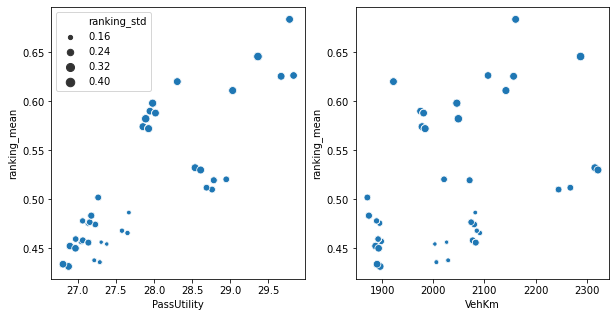

In [74]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.scatterplot(x='PassUtility',y='ranking_mean', data = ret.T, ax = ax[0], size = 'ranking_std')
sns.scatterplot(x='VehKm',y='ranking_mean', data = ret.T, ax = ax[1], size = 'ranking_std')
ax[1].get_legend().remove()

<AxesSubplot:xlabel='c', ylabel='0'>

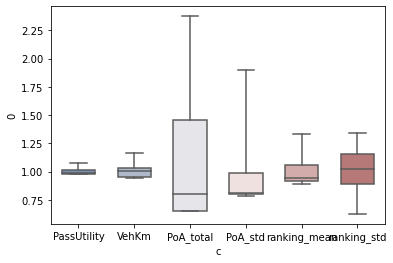

In [52]:
to_plot = ret.T/ret.mean(axis=1)
to_plot = to_plot.stack().to_frame()
to_plot['c'] = to_plot.index.get_level_values(1)
to_plot
sns.boxplot(x="c", y=0, data=to_plot,
            whis=[0, 100], width=.6, palette="vlag")

# big

In [78]:
params = ExMAS.utils.get_config('ExMAS/spinoffs/game/big.json') # load the default 
params.t0 = pd.to_datetime(params.t0)
params.matching_obj = 'u_pax'
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [79]:
params.logger_level = 'INFO'
params.avg_speed
params.shared_discount = 0.3
params.avg_speed = 8
params.nP = 400
params.matching_obj = 'u_pax'
params.t0 = '17:00'
params.t0 = pd.to_datetime(params.t0)
params.VoT = 0.0035
params.WtS = 1.3
params.price = 1.5
params.horizon = -1
params.delay_value = 1.5
params.pax_delay = 10
params.max_degree = 5

In [80]:
inData = ExMAS.utils.generate_demand(inData, params)

In [81]:
inData = ExMAS.main(inData, params)

In [98]:
inData.sblts.res

VehHourTrav                                               188165
VehHourTrav_ns                                            216261
PassHourTrav                                              239384
PassHourTrav_ns                                           216261
PassUtility                                               3010.1
PassUtility_ns                                           3354.18
mean_lambda                                             0.129085
revenue_s                                                 227074
revenue_ns                                                324392
Fare_Discount                                               -0.3
nR                                                           400
SINGLE                                                        42
PAIRS                                                        179
TRIPLES                                                        0
QUADRIPLES                                                     0
QUINTETS                 

In [84]:
inData = ExMAS.games.prepare_PoA(inData)

In [89]:
inData.logger.setLevel(logging.CRITICAL)

In [129]:
ret = ExMAS.games.test_leader_follower(inData, nShuffle = 400)

04-11-20 11:17:59-WARNING-leader-follower shuffle no:0
04-11-20 11:18:00-WARNING-leader-follower shuffle no:1
04-11-20 11:18:01-WARNING-leader-follower shuffle no:2
04-11-20 11:18:01-WARNING-leader-follower shuffle no:3
04-11-20 11:18:02-WARNING-leader-follower shuffle no:4
04-11-20 11:18:03-WARNING-leader-follower shuffle no:5
04-11-20 11:18:03-WARNING-leader-follower shuffle no:6
04-11-20 11:18:04-WARNING-leader-follower shuffle no:7
04-11-20 11:18:05-WARNING-leader-follower shuffle no:8
04-11-20 11:18:06-WARNING-leader-follower shuffle no:9
04-11-20 11:18:07-WARNING-leader-follower shuffle no:10
04-11-20 11:18:09-WARNING-leader-follower shuffle no:11
04-11-20 11:18:10-WARNING-leader-follower shuffle no:12
04-11-20 11:18:10-WARNING-leader-follower shuffle no:13
04-11-20 11:18:11-WARNING-leader-follower shuffle no:14
04-11-20 11:18:12-WARNING-leader-follower shuffle no:15
04-11-20 11:18:12-WARNING-leader-follower shuffle no:16
04-11-20 11:18:13-WARNING-leader-follower shuffle no:17
04

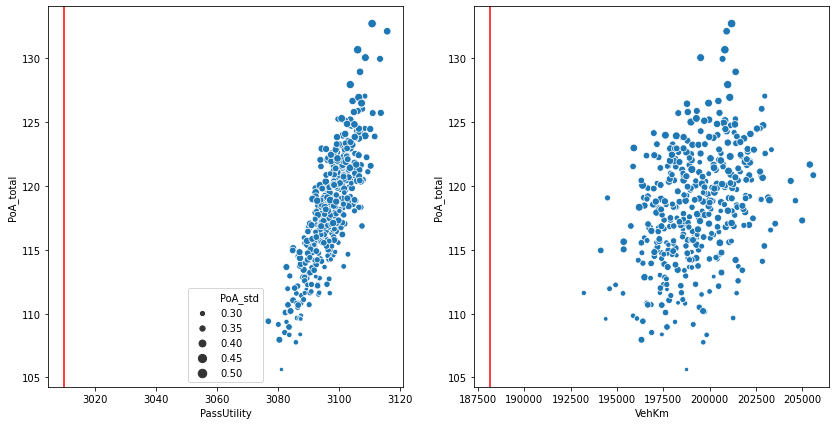

In [132]:
fig, ax = plt.subplots(1,2, figsize = (14,7))
sns.scatterplot(x='PassUtility',y='PoA_total', data = ret.T, ax = ax[0], size = 'PoA_std')
sns.scatterplot(x='VehKm',y='PoA_total', data = ret.T, ax = ax[1], size = 'PoA_std')
ax[0].axvline(inData.sblts.res.PassUtility, color = 'red')
ax[1].axvline(inData.sblts.res.VehHourTrav, color = 'red')
ax[1].get_legend().remove()

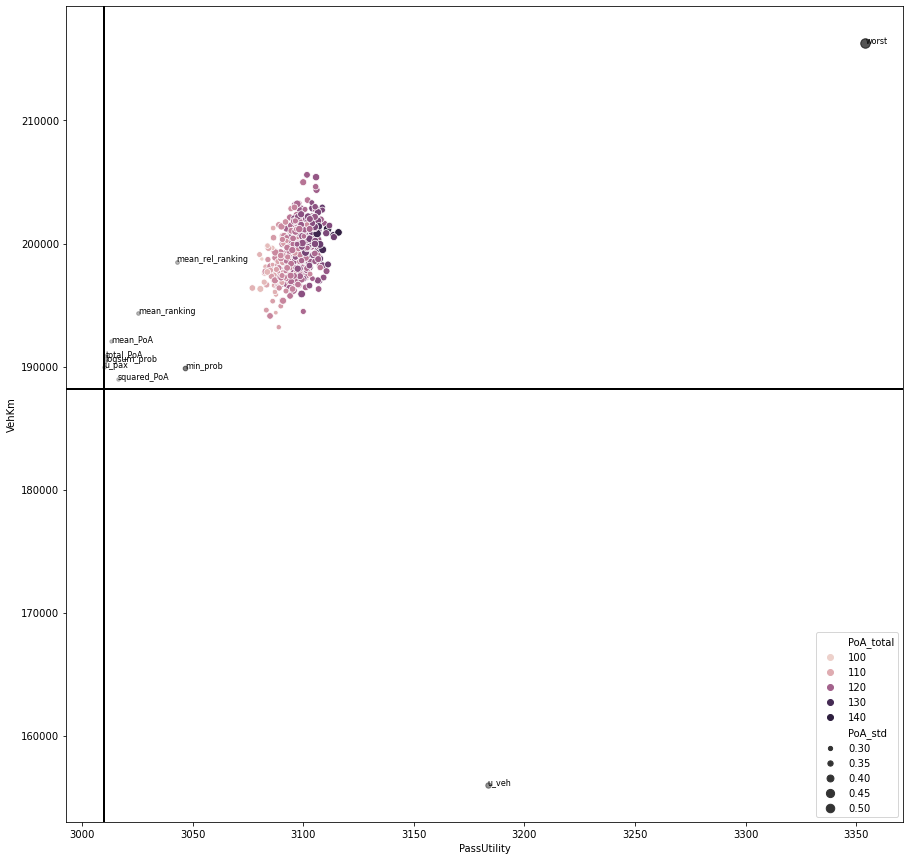

In [160]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
sns.scatterplot(x='PassUtility',y='VehKm', data = ret.T, ax = ax, size = 'PoA_std', hue = 'PoA_total')
ax.axvline(inData.sblts.res.PassUtility, color = 'black', lw = 2)
ax.axhline(inData.sblts.res.VehHourTrav, color = 'black', lw = 2)
for ilp in ilps:
    ilps[ilp].VehKm
    ax.scatter(ilps[ilp].PassUtility,ilps[ilp].VehKm,ilps[ilp].PoA_total/5, color = 'black', alpha = ilps[ilp].PoA_std)
    ax.annotate(ilp, (ilps[ilp].PassUtility,ilps[ilp].VehKm), fontsize = 8)
    #ax.axhline(ilps[ilp].VehKm, color = 'grey', lw = 0.5)
    #ax.axvline(ilps[ilp].PassUtility, color = 'grey', lw = 0.5)
plt.savefig('leader-follower.png')

In [134]:
OBJS = ['u_pax', 'u_veh','mean_ranking', 'mean_rel_ranking', 'mean_PoA', 'total_PoA','squared_PoA', 'min_prob','logsum_prob', 'worst']

In [137]:
ilps=dict()
for obj in OBJS:
    ilps[obj]=ExMAS.games.test_obj_fun(inData, params, obj = obj, _plot = False)
ilps = pd.DataFrame(ilps)
ilps

,u_pax,u_veh,mean_ranking,mean_rel_ranking,mean_PoA,total_PoA,squared_PoA,min_prob,logsum_prob,worst
PassUtility,3010.099100,3183.341512,3025.142500,3042.685225,3013.185800,3010.502425,3016.101300,3046.497000,3010.534275,3354.184500
VehKm,189955.000000,156013.000000,194370.000000,198535.000000,192048.000000,190842.000000,188964.000000,189906.000000,190415.000000,216261.000000
PoA_total,62.350000,150.045000,67.450000,71.700000,60.050000,64.000000,63.200000,110.050000,64.000000,455.600000
PoA_std,0.218693,0.410478,0.271425,0.270989,0.222156,0.252584,0.209155,0.493301,0.252495,0.676219
ranking_mean,0.396424,0.728716,0.369555,0.335227,0.368024,0.394107,0.391467,0.512960,0.393236,0.943741
ranking_std,0.301476,0.240407,0.270617,0.215912,0.270010,0.305138,0.281968,0.370303,0.305420,0.090608


In [139]:
for ilp in ilps:
    ilps[ilp].VehKm

<AxesSubplot:xlabel='c', ylabel='0'>

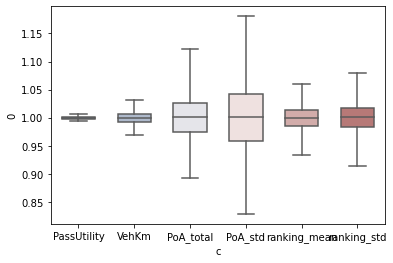

In [161]:
to_plot = ret.T/ret.mean(axis=1)
to_plot = to_plot.stack().to_frame()
to_plot['c'] = to_plot.index.get_level_values(1)
to_plot
sns.boxplot(x="c", y=0, data=to_plot,
            whis=[0, 100], width=.6, palette="vlag")

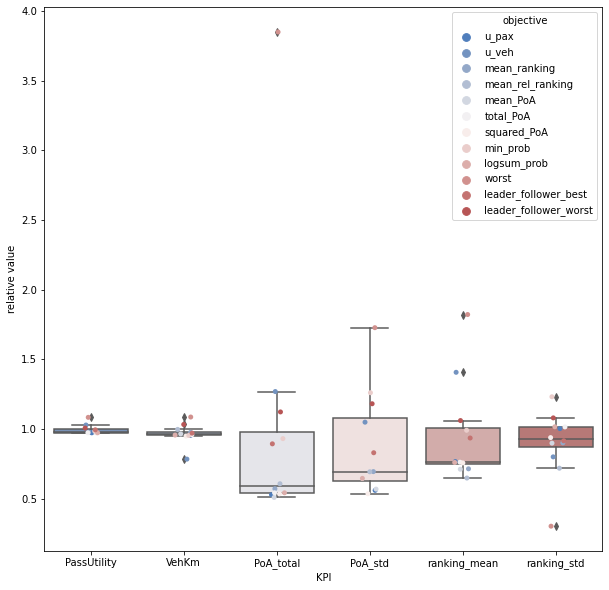

In [190]:
fig, ax  = plt.subplots(figsize=(10,10))
ilps['leader_follower_best'] = ret.min(axis=1)
ilps['leader_follower_worst'] = ret.max(axis=1)
ilps
to_plot = ilps.T/ret.mean(axis=1)
to_plot = to_plot.stack().to_frame()
to_plot['KPI'] = to_plot.index.get_level_values(1)
to_plot['objective'] = to_plot.index.get_level_values(0)
to_plot['relative value'] = to_plot[0]
to_plot
sns.boxplot(x="KPI", y='relative value', data=to_plot,
             palette="vlag")
sns.stripplot(x="KPI", y='relative value', data=to_plot,
             palette="vlag", hue = 'objective')
to_plot
plt.savefig('KPIs.png')

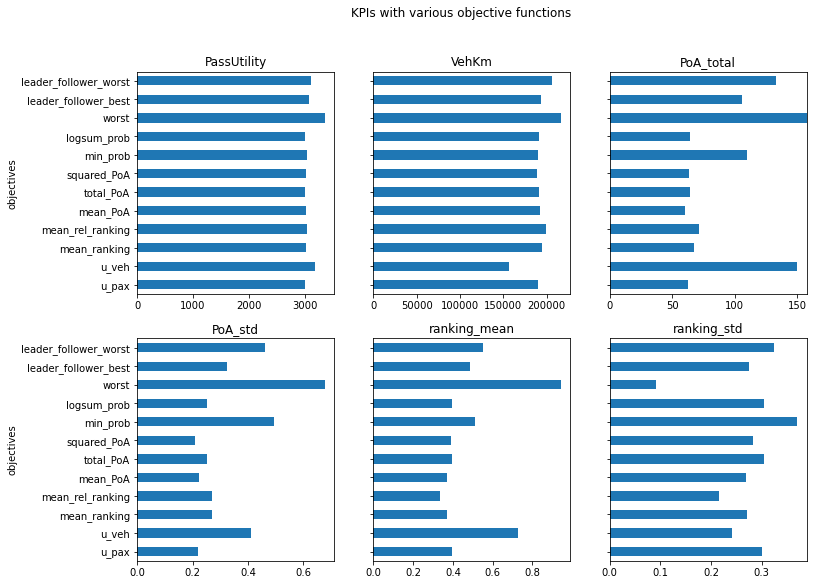

In [172]:
def plot_results(ret):
    fig, ax = plt.subplots(2,3,figsize=(12,9), sharey = True)
    ax = ax.flatten()
    i=0
    for KPI in ret.index:
        ret.loc[KPI].plot(kind='barh',ax = ax[i])
        ax[i].set_title(KPI)
        i+=1
    ax[2].set_xlim(0,ret.loc['PoA_total'].values[:-3].max()*1.05)
    fig.suptitle('KPIs with various objective functions')
    ax[0].set_ylabel('objectives')
    ax[3].set_ylabel('objectives')  
plot_results(ilps)

---
(c) Rafał Kucharski, Delft, 2020